# Plot the comparison between the array spectral-peak counts and the spectral peaks found from stacked spectrograms color coded by peak powers and reverse bandwidth

In [1]:
# Imports
from os.path import join
from pandas import read_csv, to_datetime

from utils_basic import SPECTROGRAM_DIR as indir, GEO_STATIONS as stations, STARTTIME_GEO as starttime, ENDTIME_GEO as endtime
from utils_basic import get_day_begin_and_end
from utils_spec import assemble_spec_filename, get_spectrogram_file_suffix, get_spec_peak_file_suffix, string_to_time_label, read_geo_spectrograms, read_spectral_peaks, read_spectral_peak_counts
from utils_plot import plot_array_peak_counts_vs_stacked_peaks, save_figure

In [2]:
# Inputs
# Data
min_freq = 0.0
max_freq = 200.0
window_length = 1.0
overlap = 0.0
downsample = False
downsample_factor = 60

starttime = "2020-01-13T20:00:00"
endtime = "2020-01-13T20:59:59"

stack_scale = "linear"

prom_threshold_count = 10.0
prom_threshold_stack = 5.0

rbw_threshold_count = 0.2
rbw_threshold_stack = 0.2

count_threshold = 4

file_format_in = "h5"

# Plotting
marker_size = 3
size_scale = 30

date_format = "%Y-%m-%d %H:%M:%S"
major_time_spacing = "15min"
minor_time_spacing = "5min"
time_tick_rotation = 5.0

major_freq_spacing = 50
minor_freq_spacing = 10

dbmin = -30
dbmax = 10

rbwmin = rbw_threshold_stack
rbwmax = 0.5


In [3]:
# Read the spectral-peak counts
suffix_spec = get_spectrogram_file_suffix(window_length, overlap, downsample, downsample_factor = downsample_factor)
suffix_peak = get_spec_peak_file_suffix(prom_threshold_count, rbw_threshold_count, min_freq = min_freq, max_freq = max_freq)

filename = f"geo_spectral_peak_counts_{suffix_spec}_{suffix_peak}_count{count_threshold:d}.{file_format_in}"
inpath = join(indir, filename)
count_df = read_spectral_peak_counts(inpath)

count_df = count_df.loc[(count_df["time"] > starttime) & (count_df["time"] < endtime)]

In [4]:
# Read the spectral peaks found from the stacked spectrograms
suffix_peak = get_spec_peak_file_suffix(prom_threshold_stack, rbw_threshold_stack, min_freq = min_freq, max_freq = max_freq)
filename = f"geo_stack_spectral_peaks_{suffix_spec}_{stack_scale}_{suffix_peak}.{file_format_in}"
inpath = join(indir, filename)
peak_df = read_spectral_peaks(inpath)

peak_df = peak_df.loc[(peak_df["time"] > starttime) & (peak_df["time"] < endtime)]

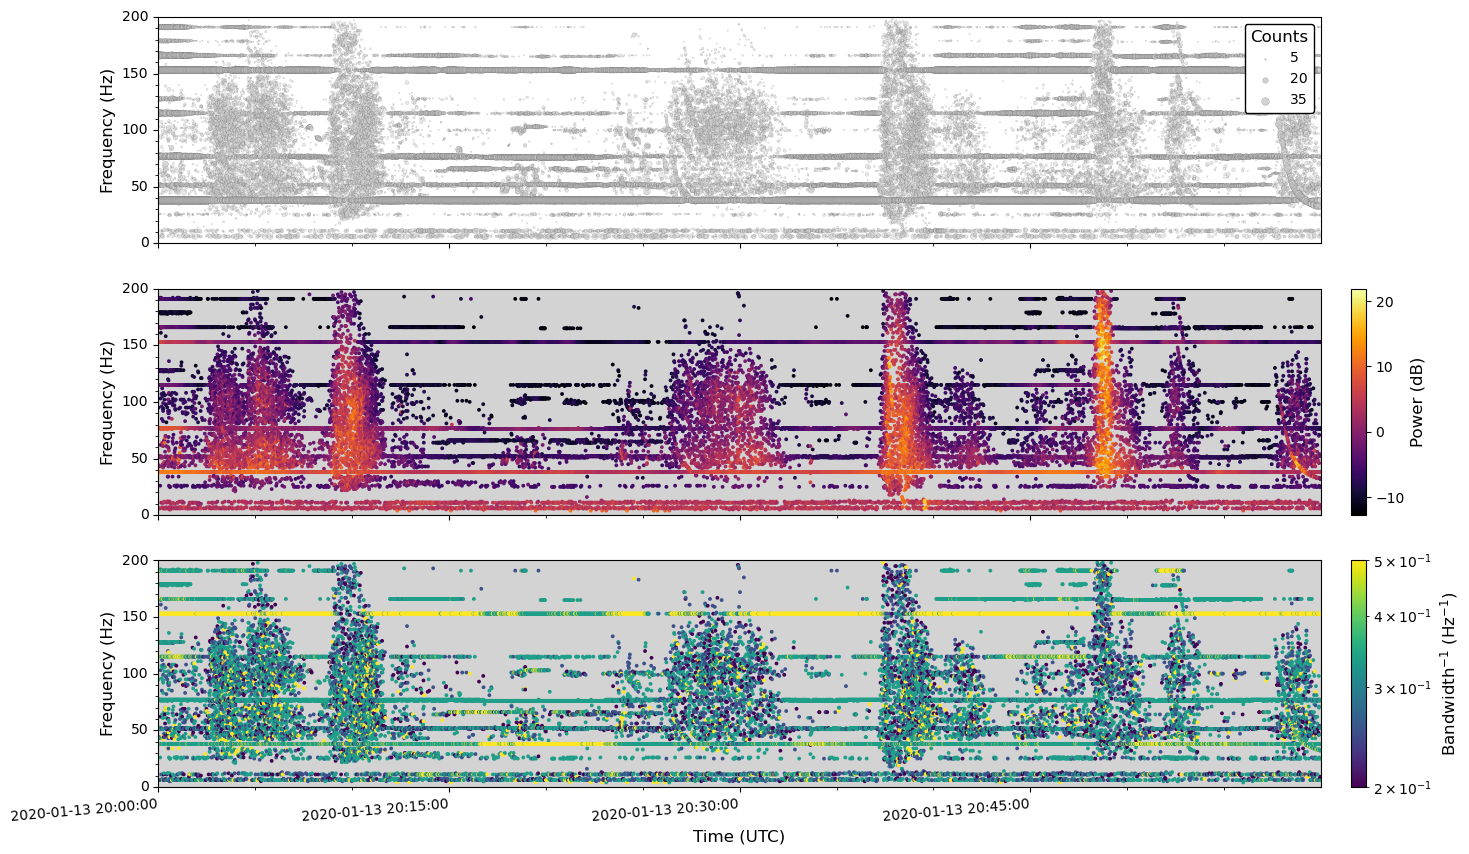

In [5]:
# Plot the spectral-peak counts vs. the stacked peaks
fig, axes, power_cbar, rbw_cbar = plot_array_peak_counts_vs_stacked_peaks(count_df, peak_df,
                                                                        size_scale = size_scale, marker_size = marker_size,
                                                                        starttime = starttime, endtime = endtime,
                                                                        min_freq = min_freq, max_freq = max_freq,
                                                                        date_format = date_format,
                                                                        major_time_spacing = major_time_spacing, minor_time_spacing = minor_time_spacing,
                                                                        time_tick_rotation = time_tick_rotation, 
                                                                        major_freq_spacing = major_freq_spacing, minor_freq_spacing = minor_freq_spacing,
                                                                        dbmin = dbmin, dbmax = dbmax,
                                                                        rbwmin = rbwmin, rbwmax = rbwmax)